In [10]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 
import time

In [11]:
warnings.filterwarnings('ignore')

In [12]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, class_sep=0.98, random_state=0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
def vvod():
    
    """
    Функция для ввода данных, с помощью которых будет проводиться классификация
    
    Parameters
    ----------
    X: numpy.ndarray
        Массив значений переменной x
    y: numpy.ndarray
        Массив значений переменной y
    X_train: numpy.ndarray
        Массив обучающей выборки переменной x
    X_test: numpy.ndarray
        Массив тестовой выборки переменной x
    y_train: numpy.ndarray
        Массив обучающей выборки переменной y
    y_test: numpy.ndarray
        Массив тестовой выборки переменной y
    
    Returns
    -----------
    Final: dictionary
        Словарь со всеми переменными, которые ранее были введены, нужен для ввода в основную функцию

    """
    
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    X, y = make_classification(n_samples=100, n_features=4, class_sep=0.98, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    Final = {'X_train': X_train,
             'X_test': X_test,
             'y_train': y_train,
             'y_test': y_test,
             'X': X,
             'y': y,}
    return Final

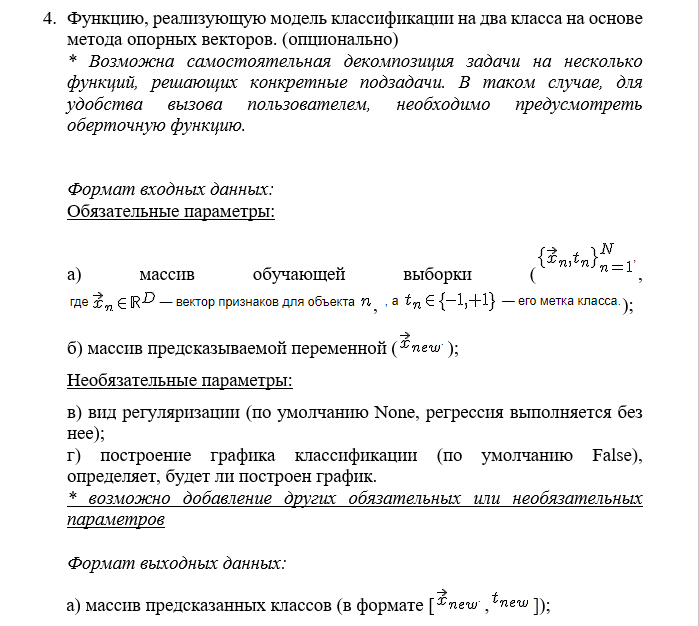

In [17]:
def SVM(dictionary):
    
    """
    Функция, реализующая модель классификации на два класса на основе метода опорных векторов.
    
    Parameters
    ----------
    dictionary: dictionary
        Словарь со всеми переменными, которые ранее были введены в функции vvod


    Returns
    -----------
    dicc: dict
        Словарь вида {x_test: y_pred}, тестовое значение переменной х сопоставляется с предсказанным значением переменной y

    
    """
    import numpy as np
    import pandas as pd
    import sklearn
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix 
    
    start = time.time()
    
    X_train = dictionary['X_train']
    X_test = dictionary['X_test']
    y_train = dictionary['y_train']
    y_test = dictionary['y_test']
    X = dictionary['X']
    y = dictionary['y']
    
    clf = svm.SVC().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
    print('Precision = ', metrics.precision_score(y_test, y_pred, average = 'macro' ))
    print('Recall = ', metrics.recall_score(y_test, y_pred, average = 'macro'))
    
    fig, ax = plt.subplots()
    dicc={}
    print('Коэффииценты регрессии: ', clf.dual_coef_)
    print('\n Массив предсказанных значений:\n')
    for i in range(len(X_test)):
        dicc[f'{X_test[i]}'] = y_pred[i]
    print(dicc)

    plt.ylabel('Feature №1')
    plt.xlabel('Feature №0')

    z=[(-0.7, -0.3, 0.33)]
    xfit = np.linspace(-4, 2.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
    for m, b, d in z:

        yfit = m * xfit + b

    plt.plot(xfit, yfit, '-k')
    
    stop = time.time()
    print('Время работы алгоритма: ', stop - start)

Accuracy =  0.85
Precision =  0.8535353535353536
Recall =  0.8500000000000001
Коэффииценты регрессии:  [[-0.04751121 -1.         -0.50957283 -1.         -1.         -1.
  -1.         -0.54338434 -0.12572762 -1.         -1.         -1.
  -1.         -0.42883887 -1.         -0.18091129 -1.         -1.
  -1.          1.          1.          1.          0.25764307  1.
   1.          1.          1.          0.79779532  1.          0.56623173
   1.          1.          1.          0.291046    0.92323005  1.        ]]

 Массив предсказанных значений:

{'[ 1.32057624 -0.82151654 -0.12789457  1.11018675]': 1, '[ 2.40548085 -0.55681472  0.83144036  2.65919386]': 1, '[-1.15058206  0.00809112 -0.69023363 -1.44699573]': 0, '[1.45049892 1.27087445 2.32137626 2.6925965 ]': 1, '[-0.30978825 -0.87872307 -1.18374176 -0.98674458]': 0, '[ 1.81240861 -1.88176739 -1.02999632  1.01234348]': 0, '[-1.18114435  0.12416423 -0.57732184 -1.40689316]': 0, '[ 0.33117341 -0.95058207 -0.87552621 -0.22631452]': 0, '[-0

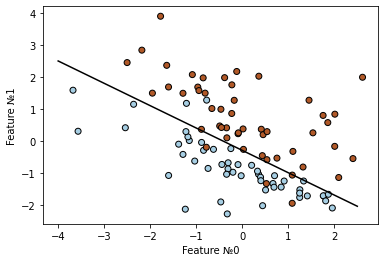

In [18]:
SVM(vvod())

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



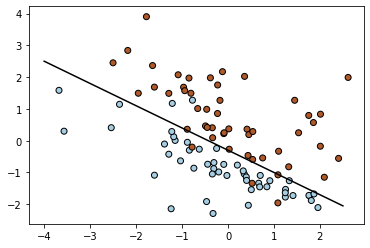

In [184]:
xfit = np.linspace(-4, 2.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
for m, b, d in z:

    yfit = m * xfit + b

    plt.plot(xfit, yfit, '-k')
print(classification_report(y_test,y_pred))

correlation between  0  1   =:  0.5
correlation between  0  2   =:  0.5
correlation between  0  3   =:  0.5
correlation between  1  0   =:  0.55
correlation between  1  2   =:  0.55
correlation between  1  3   =:  0.55
correlation between  2  0   =:  0.6
correlation between  2  1   =:  0.6
correlation between  2  3   =:  0.6
correlation between  3  0   =:  0.65
correlation between  3  1   =:  0.65
correlation between  3  2   =:  0.65


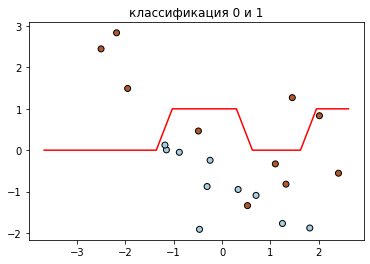

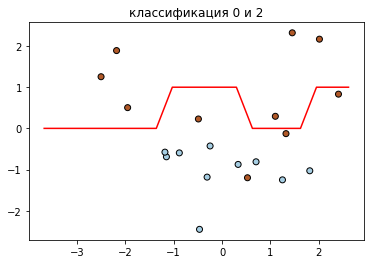

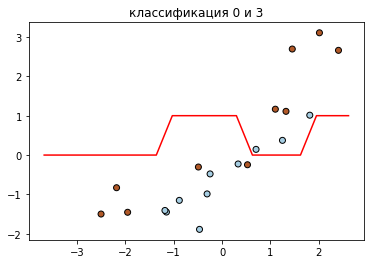

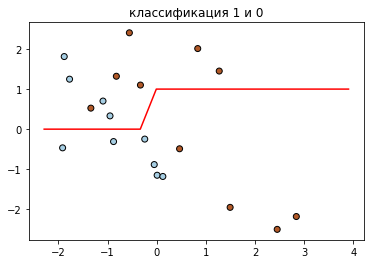

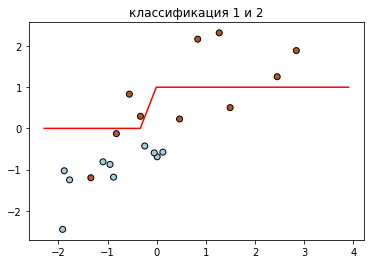

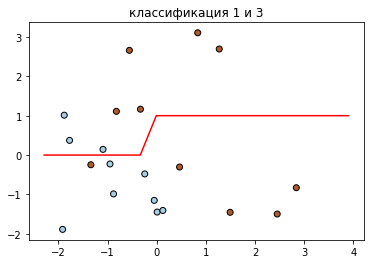

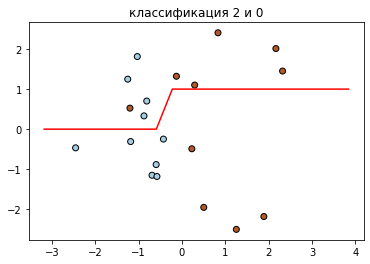

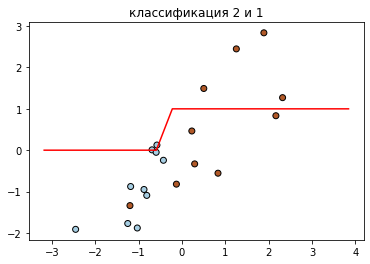

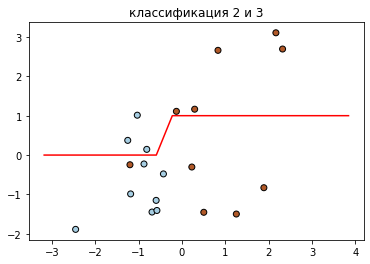

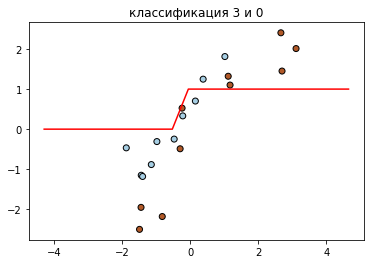

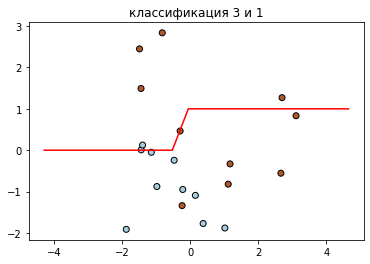

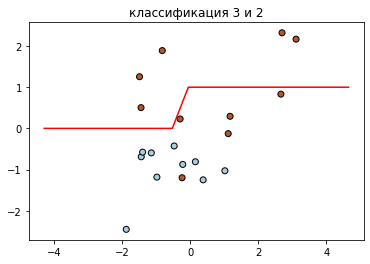

In [204]:
for i in range(4):
    for j in range(4):
        if i!=j:
                
                curr_column = X[:, i]
                curr_column_train = X_train[:, i].reshape(-1, 1)
             
                model=svm.SVC().fit(curr_column_train, y_train)
                linsp = np.linspace(curr_column.min(), curr_column.max(), 20).reshape(-1, 1)
                predicted = model.predict(linsp)
                print(f"correlation between  {i}  {j}   =:  {metrics.accuracy_score(y_test, predicted)}")                

                plt.figure()
                plt.scatter(X_test[:, i], X_test[:, j ], c=y_test, cmap=plt.cm.Paired, edgecolors="k") 
                #print(metrics.accuracy_score(y_test, predicted))
                plt.title(f"классификация {i} и {j}")
                plt.plot(linsp, predicted, 'r')
              

In [11]:
help(vvod)

Help on function vvod in module __main__:

vvod()
    Функция для ввода данных, с помощью которых будет проводиться классификация
    
    Parameters
    ----------
    X: numpy.ndarray
        Массив значений переменной x
    y: numpy.ndarray
        Массив значений переменной y
    X_train: numpy.ndarray
        Массив обучающей выборки переменной x
    X_test: numpy.ndarray
        Массив тестовой выборки переменной x
    y_train: numpy.ndarray
        Массив обучающей выборки переменной y
    y_test: numpy.ndarray
        Массив тестовой выборки переменной y
    
    Returns
    -----------
    Final: dictionary
        Словарь со всеми переменными, которые ранее были введены, нужен для ввода в основную функцию



In [12]:
help(SVM)

Help on function SVM in module __main__:

SVM(dictionary)
    Функция, реализующая модель классификации на два класса на основе метода опорных векторов.
    
    Parameters
    ----------
    dictionary: dictionary
        Словарь со всеми переменными, которые ранее были введены в функции vvod
    
    
    Returns
    -----------
    dicc: dict
        Словарь вида {x_test: y_pred}, тестовое значение переменной х сопоставляется с предсказанным значением переменной y

